<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-read-package-and-file" data-toc-modified-id="Load-and-read-package-and-file-1">Load and read package and file</a></span></li><li><span><a href="#Task1:-Cleaning-Data" data-toc-modified-id="Task1:-Cleaning-Data-2">Task1: Cleaning Data</a></span></li><li><span><a href="#Task2:-Analyze-data" data-toc-modified-id="Task2:-Analyze-data-3">Task2: Analyze data</a></span><ul class="toc-item"><li><span><a href="#2.1:-Central-tendency-and-dispersion-check" data-toc-modified-id="2.1:-Central-tendency-and-dispersion-check-3.1">2.1: Central tendency and dispersion check</a></span></li><li><span><a href="#2.2:-Graphic-representations" data-toc-modified-id="2.2:-Graphic-representations-3.2">2.2: Graphic representations</a></span><ul class="toc-item"><li><span><a href="#2.2.1:-Boxplot-Product-Category-VS-Price" data-toc-modified-id="2.2.1:-Boxplot-Product-Category-VS-Price-3.2.1">2.2.1: Boxplot Product Category VS Price</a></span></li><li><span><a href="#2.2.2:-Times-series-Month-VS-Transaction-Amount" data-toc-modified-id="2.2.2:-Times-series-Month-VS-Transaction-Amount-3.2.2">2.2.2: Times series Month VS Transaction Amount</a></span></li><li><span><a href="#2.2.3:-Bivariate-Analysis-Visualzation:-Age-VS-Price-of-item-purchased" data-toc-modified-id="2.2.3:-Bivariate-Analysis-Visualzation:-Age-VS-Price-of-item-purchased-3.2.3">2.2.3: Bivariate Analysis Visualzation: Age VS Price of item purchased</a></span></li></ul></li></ul></li><li><span><a href="#Task3:-Answering-questions" data-toc-modified-id="Task3:-Answering-questions-4">Task3: Answering questions</a></span><ul class="toc-item"><li><span><a href="#3.1:-Is-there-a-correlation-between-gender-and-categories-of-products-purchased?" data-toc-modified-id="3.1:-Is-there-a-correlation-between-gender-and-categories-of-products-purchased?-4.1">3.1: Is there a correlation between gender and categories of products purchased?</a></span></li><li><span><a href="#3.2:-Correlation-Age-VS-Total-Amount-Purchase" data-toc-modified-id="3.2:-Correlation-Age-VS-Total-Amount-Purchase-4.2">3.2: Correlation Age VS Total Amount Purchase</a></span></li></ul></li></ul></div>

# Load and read package and file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')



# Task1: Cleaning Data 

Cleaning outliers and change format

In [3]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')
transactions['month'] = transactions['date'].dt.month
customers['year']=int('2021')
customers['age']=customers['year']-customers['birth']
transactions.dropna(subset = ["month"], inplace=True)
#products.isnull().sum()


# Task2: Analyze data 
central tendency and disperson using lorenz curve and gini coefficient, graphic representations, bivariate analysis 

## 2.1: Central tendency and dispersion check 

Text(46.99103560245854, 1367.415, 'Mean: 42.72')

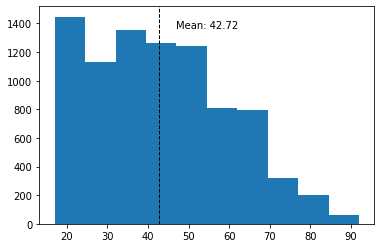

In [4]:
plt.hist(customers.age, bins = 10)
plt.axvline(customers.age.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers.age.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers.age.mean()))


In [5]:
age=customers.age.to_numpy()

def gini(age):
    ## first sort
    sorted_arr = age.copy()
    sorted_arr.sort()
    n = age.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(age)


0.22598863728102248

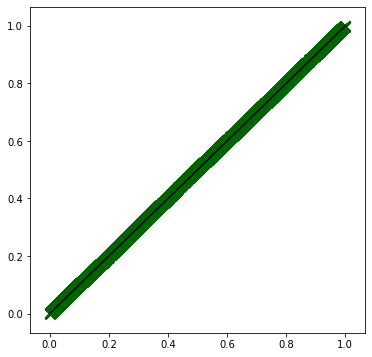

In [6]:
X_lorenz = age.cumsum() / age.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]
(0.0, 1.0)
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')

## 2.2: Graphic representations

### 2.2.1: Boxplot Product Category VS Price 

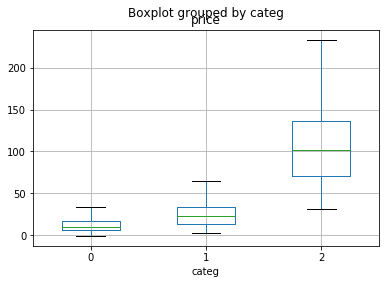

In [7]:
products.boxplot(by ='categ', column =['price'],showfliers=False, widths=(0.5, 0.5,0.5)) 


### 2.2.2: Times series Month VS Transaction Amount

In [8]:
transactions.head()

,id_prod,date,session_id,client_id,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,9.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,10.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,7.0


([<matplotlib.axis.XTick at 0x26dcc82e6c8>,
 <a list of 12 Text xticklabel objects>)

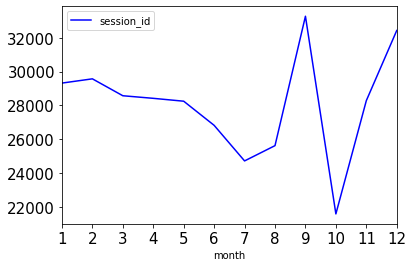

In [9]:
monthly_transactions=transactions.groupby('month')['session_id'].count()
monthly_transactions = pd.DataFrame(monthly_transactions).reset_index()
monthly_transactions['month'] = pd.to_datetime(monthly_transactions['month'].astype(str), format='%m.0')
monthly_transactions['month']= monthly_transactions['month'].dt.month
monthly_transactions.set_index('month',inplace=True)

# Plot the time series in your DataFrame as a blue area chart
ax = monthly_transactions.plot(color='blue', fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))


### 2.2.3: Bivariate Analysis Visualzation: Age VS Price of item purchased

In [10]:
transactions_products_info=pd.merge(transactions,products,on='id_prod')
merged=pd.merge(customers,transactions_products_info,on='client_id')
merged=merged.fillna(0)
merged=merged.reset_index()
merged

,index,client_id,sex,birth,year,age,id_prod,date,session_id,month,price,categ
0,0,c_4410,f,1967,2021,54,0_1420,2021-03-22 22:31:25.825764,s_10092,3.0,11.53,0
1,1,c_4410,f,1967,2021,54,0_1390,2021-09-24 23:35:40.652636,s_94984,9.0,19.37,0
2,2,c_4410,f,1967,2021,54,1_483,2021-03-13 21:35:55.949042,s_5913,3.0,15.99,1
3,3,c_4410,f,1967,2021,54,1_267,2021-09-24 23:15:59.919591,s_94984,9.0,27.99,1
4,4,c_4410,f,1967,2021,54,1_395,2021-09-24 23:57:35.138518,s_94984,9.0,28.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...
336708,336708,c_84,f,1982,2021,39,0_1113,2021-04-13 04:10:27.679097,s_19845,4.0,16.99,0
336709,336709,c_84,f,1982,2021,39,0_1525,2021-10-21 03:58:28.880240,s_107849,10.0,6.99,0
336710,336710,c_84,f,1982,2021,39,0_1017,2021-09-13 21:40:46.038481,s_89478,9.0,8.99,0
336711,336711,c_84,f,1982,2021,39,1_158,2021-10-01 16:11:20.841361,s_98493,10.0,22.17,1


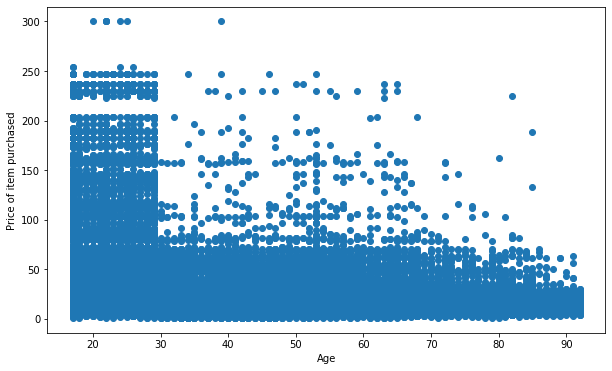

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = merged['age'], y = merged['price'])
plt.xlabel("Age")
plt.ylabel("Price of item purchased")
plt.show()

# Task3: Answering questions

## 3.1: Is there a correlation between gender and categories of products purchased?

In [12]:
# two qualitative variables on hands- use contingency table calculation

#from sklearn.metrics import r2_score
#from scipy import stats
#merged['sex'] = merged['sex'].astype(int)
#s = pd.Series(merged.sex)
#sex_dummies=pd.get_dummies(s)
#sex_dummies
#sex_category= pd.concat([merged, sex_dummies], axis = 1)
#sex_category = sex_category[["categ", "f","m"]]
#sex_category.head()


,categ,f,m
0,0,1,0
1,0,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [71]:
#https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html

from sklearn.metrics import r2_score
from scipy import stats
from functools import reduce
X = "categ"
Y = "sex"
observation = merged[['categ','sex']].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
observation=observation.reset_index()
observation=observation.set_index('categ')

observation = observation[['f', 'm']]
observation=observation.iloc[0:3]

observation

sex,f,m
categ,,
0,103786,105640
1,55469,54266
2,8260,9292


In [72]:
observation = observation.to_numpy()
observation
c = np.apply_over_axes(np.sum, observation, 0) # column totals of observations table
r = np.apply_over_axes(np.sum, observation, 1) # row totals of observations table
exp_freq = reduce(np.multiply, (r, c)) / np.sum(observation)
cont_table = np.absolute(observation - exp_freq)
cont_table= cont_table ** 2 / exp_freq
cont_table

array([[ 1.563511  ,  1.54795888],
       [14.0480737 , 13.90833855],
       [25.5276867 , 25.27376469]])

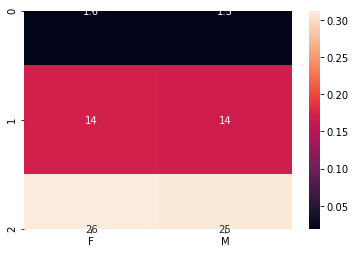

In [82]:
cont_table=pd.DataFrame(cont_table)
cont_table=cont_table.rename(columns={0: 'F', 1: 'M'})
xi_n = cont_table.sum().sum()
sns.heatmap(cont_table/xi_n,annot=cont_table)
plt.show()



## 3.2: Correlation Age VS Total Amount Purchase

In [84]:
## two quantitative variables 

total_amount_purchase=merged.groupby('age')['price'].sum()
purchase_frequency=merged.groupby('age')['month'].count()
average_basket_size=merged.groupby('age')['categ'].count()
category_purchased_products=merged.groupby(['age', 'categ'])['session_id'].count()
total_amount_purchase=total_amount_purchase.to_frame().reset_index()
total_amount_purchase.corr()

,age,price
age,1.000000,-0.774658
price,-0.774658,1.000000


In [ ]:
purchase_frequency=purchase_frequency.to_frame().reset_index()
purchase_frequency.corr()
average_basket_size=average_basket_size.to_frame().reset_index()
average_basket_size.corr()
category_purchased_products=category_purchased_products.to_frame().reset_index()
category_purchased_products = category_purchased_products.rename(columns={'session_id': 'categ_count'})
category_purchased_products

In [ ]:
##linear regression with categorical variables python
##correlation example https://www.vertica.com/blog/in-database-machine-learning-2-calculate-a-correlation-matrix-a-data-exploration-post/

In [ ]:
# R^2
corr=merged.corr('pearson') 
corr
x_age=np.array(merged.sex)
y_category=np.array(merged.categ)
correlation_matrix = np.corrcoef(x_age, y_category)


In [ ]:
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)